In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
# Load the dataset
data_path = 'creditcard_2023.csv'
df = pd.read_csv(data_path)

# Display the first few rows of the dataset and basic info
df_info = df.info()
df_head = df.head()
df_info, df_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

(None,
    id        V1        V2        V3        V4        V5        V6        V7  \
 0   0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898  0.519014   
 1   1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605  0.406466   
 2   2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481  0.743511   
 3   3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312  0.518269   
 4   4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549  0.658849   
 
          V8        V9  ...       V21       V22       V23       V24       V25  \
 0 -0.130006  0.727159  ... -0.110552  0.217606 -0.134794  0.165959  0.126280   
 1 -0.133118  0.347452  ... -0.194936 -0.605761  0.079469 -0.577395  0.190090   
 2 -0.095576 -0.261297  ... -0.005020  0.702906  0.945045 -1.154666 -0.605564   
 3 -0.065130 -0.205698  ... -0.146927 -0.038212 -0.214048 -1.893131  1.003963   
 4 -0.212660  1.049921  ... -0.106984  0.729727 -0.161666  0.312561 -0.414116   
 
         V26       V27 

In [2]:
import scipy.stats as stats

# Calculate the Pearson correlation coefficient between Amount and Class
correlation_amount_class = df['Amount'].corr(df['Class'])

# Perform a Mann-Whitney U Test to see if there's a significant difference in Amount between fraudulent and non-fraudulent transactions
# This test is chosen because it does not assume a normal distribution of Amount
fraudulent = df[df['Class'] == 1]['Amount']
non_fraudulent = df[df['Class'] == 0]['Amount']

u_statistic, p_value = stats.mannwhitneyu(fraudulent, non_fraudulent, alternative='two-sided')

correlation_amount_class, u_statistic, p_value


(0.0022608304015543828, 40523046082.5, 0.08815506456455785)

In [3]:
# Define amount brackets for segmentation
bins = [0, 100, 500, 1000, 5000, 10000, max(df['Amount'])]
labels = ['0-100', '101-500', '501-1000', '1001-5000', '5001-10000', '>10000']
df['Amount_Bracket'] = pd.cut(df['Amount'], bins=bins, labels=labels, right=False)

# Calculate the prevalence of fraud in each segment
fraud_prevalence_by_amount_bracket = df.groupby('Amount_Bracket')['Class'].mean()

fraud_prevalence_by_amount_bracket


Amount_Bracket
0-100         0.499160
101-500       0.491665
501-1000      0.495820
1001-5000     0.498880
5001-10000    0.498638
>10000        0.501197
Name: Class, dtype: float64

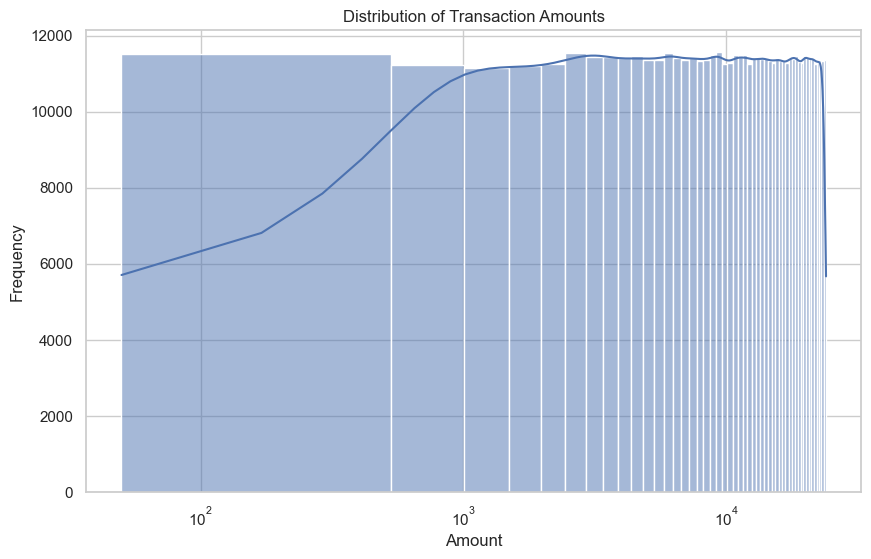

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Step 1: Distribution of Transaction Amounts
plt.figure(figsize=(10, 6))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.xscale('log') # Using a log scale due to the wide range of transaction amounts
plt.show()


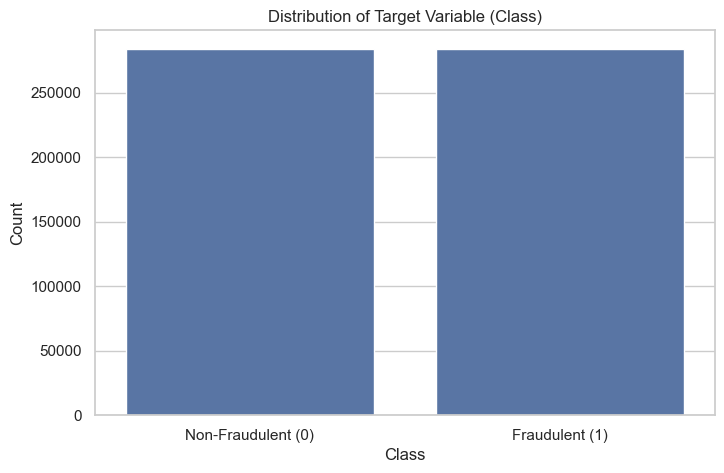

50.0

In [24]:
# Step 2: Balance of Target Variable (Class)
plt.figure(figsize=(8, 5))
sns.countplot(x='Class', data=df)
plt.title('Distribution of Target Variable (Class)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Fraudulent (0)', 'Fraudulent (1)'])
plt.show()

# Calculate the percentage of fraudulent transactions
fraud_percentage = df['Class'].mean() * 100
fraud_percentage


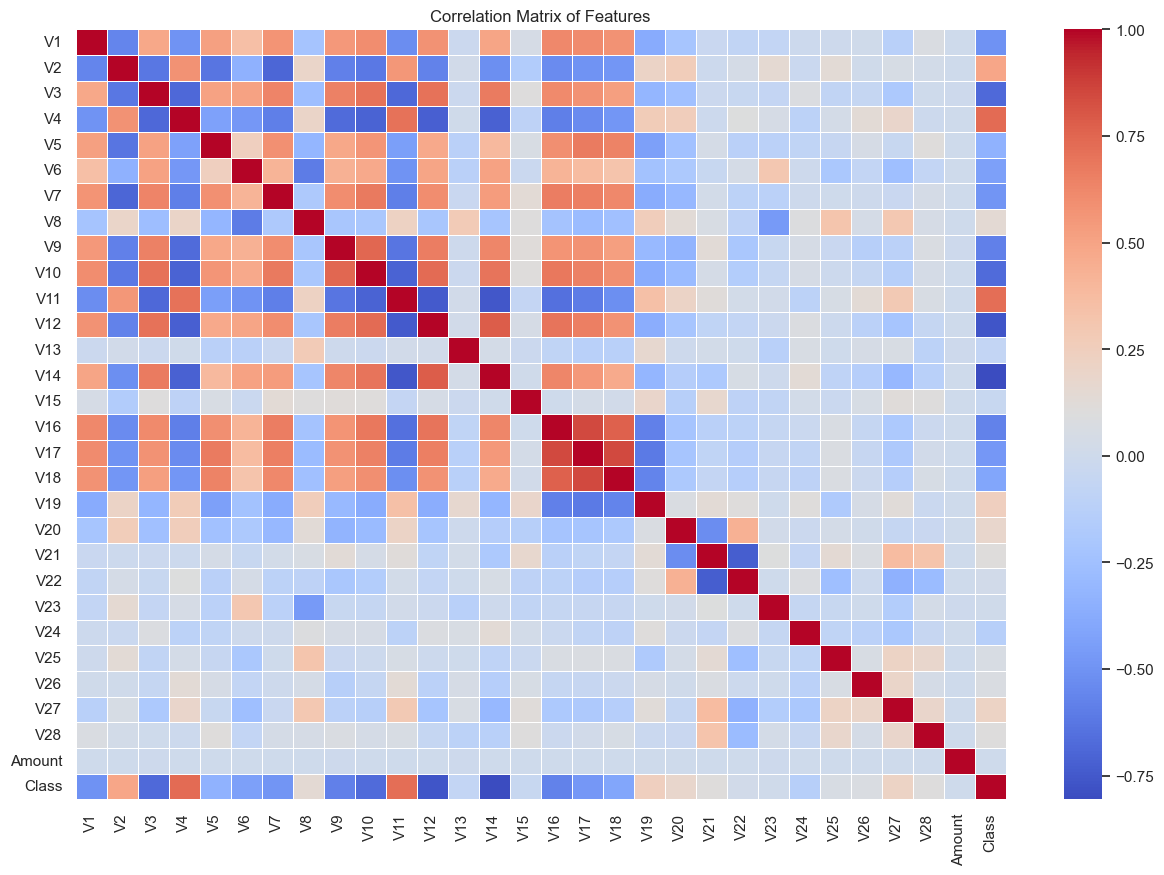

In [25]:
# Step 3: Correlation Matrix excluding the 'id' column
corr_matrix = df.drop(['id', 'Amount_Bracket'], axis=1).corr()

# Plotting the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, linewidths=.5)
plt.title('Correlation Matrix of Features')
plt.show()


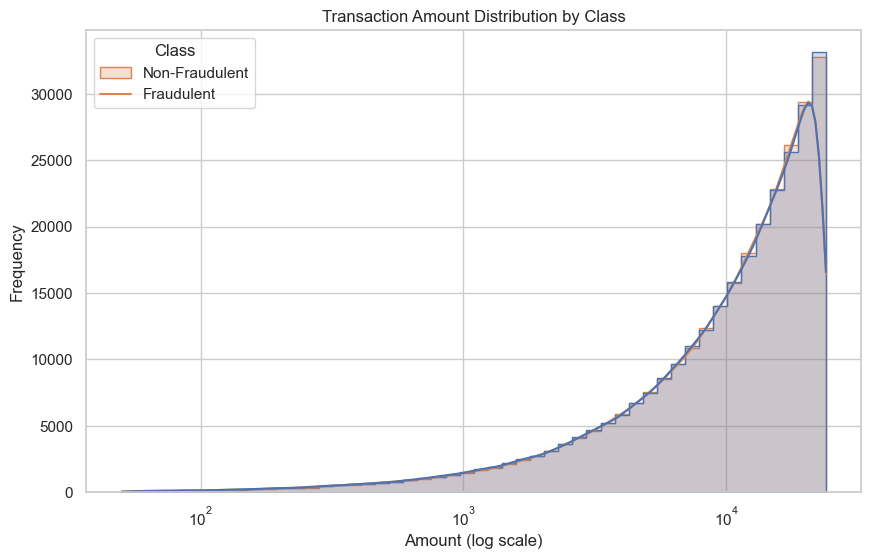

In [26]:
# Step 4: Amount Distribution for Fraudulent vs. Non-Fraudulent Transactions
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Amount', hue='Class', bins=50, kde=True, log_scale=True, element='step')
plt.title('Transaction Amount Distribution by Class')
plt.xlabel('Amount (log scale)')
plt.ylabel('Frequency')
plt.legend(title='Class', labels=['Non-Fraudulent', 'Fraudulent'])
plt.show()


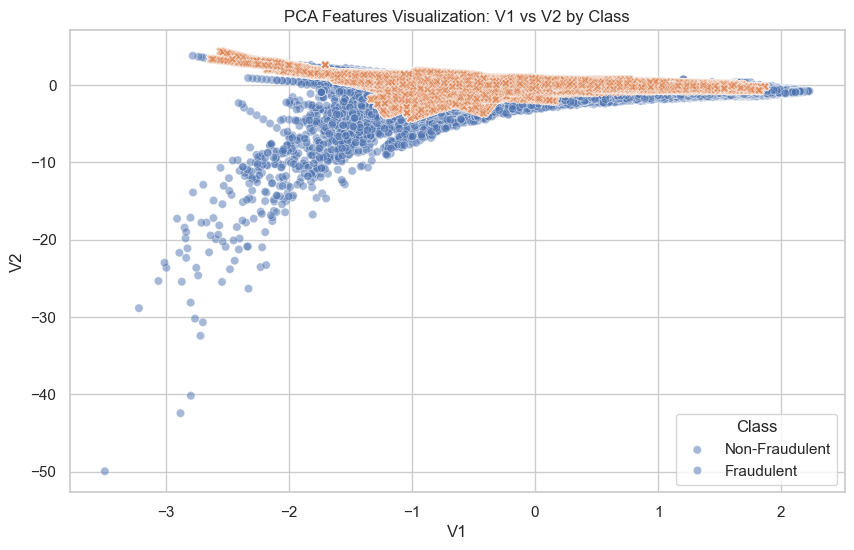

In [27]:
# Step 5: PCA Features Visualization (V1 vs. V2)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='V1', y='V2', hue='Class', style='Class', alpha=0.5)
plt.title('PCA Features Visualization: V1 vs V2 by Class')
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend(title='Class', labels=['Non-Fraudulent', 'Fraudulent'])
plt.show()


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



# Define the features and target variable
X = df.drop(['id', 'Class', 'Amount_Bracket'], axis=1)
y = df['Class']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Output the shape of the splits to confirm successful preparation
X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape



((454904, 29), (113726, 29), (454904,), (113726,))

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Logistic Regression model
log_reg = LogisticRegression(random_state=42)

# Train the Logistic Regression model
log_reg.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_log_reg = log_reg.predict(X_test_scaled)

# Evaluate the Logistic Regression model
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
log_reg_classification_report = classification_report(y_test, y_pred_log_reg)
log_reg_confusion_matrix = confusion_matrix(y_test, y_pred_log_reg)

# Initialize the Gradient Boosting Classifier
gbm = GradientBoostingClassifier(random_state=42)

# Train the GBM model
gbm.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_gbm = gbm.predict(X_test_scaled)

# Evaluate the GBM model
gbm_accuracy = accuracy_score(y_test, y_pred_gbm)
gbm_classification_report = classification_report(y_test, y_pred_gbm)
gbm_confusion_matrix = confusion_matrix(y_test, y_pred_gbm)

(log_reg_accuracy, log_reg_classification_report, log_reg_confusion_matrix,
 gbm_accuracy, gbm_classification_report, gbm_confusion_matrix)


(0.9649772259641595,
 '              precision    recall  f1-score   support\n\n           0       0.95      0.98      0.97     56863\n           1       0.98      0.95      0.96     56863\n\n    accuracy                           0.96    113726\n   macro avg       0.97      0.96      0.96    113726\nweighted avg       0.97      0.96      0.96    113726\n',
 array([[55598,  1265],
        [ 2718, 54145]], dtype=int64),
 0.9792923342067777,
 '              precision    recall  f1-score   support\n\n           0       0.97      0.99      0.98     56863\n           1       0.99      0.97      0.98     56863\n\n    accuracy                           0.98    113726\n   macro avg       0.98      0.98      0.98    113726\nweighted avg       0.98      0.98      0.98    113726\n',
 array([[56226,   637],
        [ 1718, 55145]], dtype=int64))

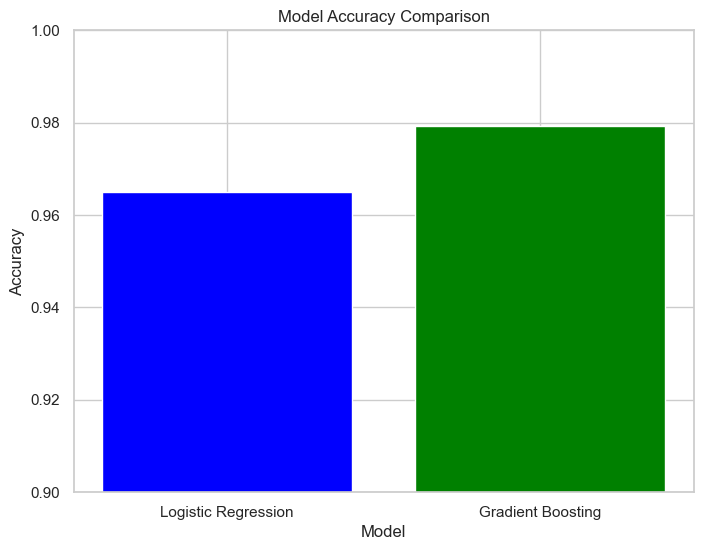

In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Assuming `df` is the DataFrame with the data used previously

# Define the features and target variable
X = df.drop(['id', 'Class', 'Amount_Bracket'], axis=1)
y = df['Class']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the models
log_reg = LogisticRegression(random_state=42)
gbm = GradientBoostingClassifier(random_state=42)

# Train the models
log_reg.fit(X_train_scaled, y_train)
gbm.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_log_reg = log_reg.predict(X_test_scaled)
y_pred_gbm = gbm.predict(X_test_scaled)

# Evaluate the models
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
gbm_accuracy = accuracy_score(y_test, y_pred_gbm)

# Prepare the data for plotting
models = ['Logistic Regression', 'Gradient Boosting']
accuracy_scores = [log_reg_accuracy, gbm_accuracy]

# Generate the accuracy comparison bar chart
plt.figure(figsize=(8, 6))
plt.bar(models, accuracy_scores, color=['blue', 'green'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.9, 1.0)  # Assuming the accuracy is very high, we can focus on the top range
plt.title('Model Accuracy Comparison')
plt.show()
